**SPAM CLASSIFICATION USING BERT**

In [1]:
!pip3 install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 57.8 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
import tensorflow_text as text
import tensorflow_hub as hub

In [ ]:
##We're using BERT-BASE- 12 ENCODERS

In [3]:
preprocess_url= 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
encoder_url= 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'

In [4]:
preprocess_module = hub.load(preprocess_url)
encoder_module = hub.load(encoder_url)

text_test= ['I dont like pasta', 'I love Machine Learning']

text_processed=preprocess_module(text_test)
text_processed.keys()

dict_keys(['input_type_ids', 'input_mask', 'input_word_ids'])

In [5]:
import pandas as pd

# Replace 'path_to_spam.csv' with the actual path to your 'spam.csv' file
path_to_spam_csv = '/content/drive/MyDrive/BERT_anitha/spam.csv'

# Reading the CSV file using Pandas with 'latin1' encoding
data = pd.read_csv(path_to_spam_csv, encoding='latin1', usecols=[0, 1], names=['Category', 'Message'])

# Display the first few rows of the DataFrame to verify the data
print(data.head())


  Category                                            Message
0       v1                                                 v2
1      ham  Go until jurong point, crazy.. Available only ...
2      ham                      Ok lar... Joking wif u oni...
3     spam  Free entry in 2 a wkly comp to win FA Cup fina...
4      ham  U dun say so early hor... U c already then say...


In [6]:
data.head

<bound method NDFrame.head of      Category                                            Message
0          v1                                                 v2
1         ham  Go until jurong point, crazy.. Available only ...
2         ham                      Ok lar... Joking wif u oni...
3        spam  Free entry in 2 a wkly comp to win FA Cup fina...
4         ham  U dun say so early hor... U c already then say...
...       ...                                                ...
5568     spam  This is the 2nd time we have tried 2 contact u...
5569      ham              Will Ì_ b going to esplanade fr home?
5570      ham  Pity, * was in mood for that. So...any other s...
5571      ham  The guy did some bitching but I acted like i'd...
5572      ham                         Rofl. Its true to its name

[5573 rows x 2 columns]>

In [7]:
import pandas as pd

# Assuming 'data' is your DataFrame with the first row you want to drop
data = data.drop(data.index[0])

# Display the DataFrame after dropping the first row
print(data)


     Category                                            Message
1         ham  Go until jurong point, crazy.. Available only ...
2         ham                      Ok lar... Joking wif u oni...
3        spam  Free entry in 2 a wkly comp to win FA Cup fina...
4         ham  U dun say so early hor... U c already then say...
5         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5568     spam  This is the 2nd time we have tried 2 contact u...
5569      ham              Will Ì_ b going to esplanade fr home?
5570      ham  Pity, * was in mood for that. So...any other s...
5571      ham  The guy did some bitching but I acted like i'd...
5572      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [8]:
data.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    653  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [90]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Filtering the DataFrame to keep only 747 samples in each class
df_resampled = data.groupby('Category').apply(lambda x: x.sample(747)).reset_index(drop=True)

# Printing the value counts to verify the number of samples in each class
print(df_resampled['Category'].value_counts())


ham     747
spam    747
Name: Category, dtype: int64


In [9]:
!pip install -U imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE

# Assuming 'data' is your DataFrame containing the 'Category' and 'Message' columns

# Separate the features and target variable
X = data['Message']
y = data['Category']

# Use CountVectorizer to convert text data to numerical form
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Apply SMOTE to the vectorized data
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_vectorized, y)

# Create a DataFrame from the resampled data
df_resampled = pd.DataFrame(X_res.toarray(), columns=vectorizer.get_feature_names_out())
df_resampled['Category'] = y_res

# Drop the columns with zero values
df_resampled = df_resampled.loc[:, (df_resampled != 0).any(axis=0)]

# Retrieve the original 'Message' column
df_resampled['Message'] = data['Message']

# Reorder the columns to have 'Category' and 'Message' first
df_resampled = df_resampled[['Category', 'Message']]

# Verify the class distribution after applying SMOTE
print(df_resampled['Category'].value_counts())


ham     4825
spam    4825
Name: Category, dtype: int64


In [11]:
df_resampled

,Category,Message
0,ham,NaN
1,ham,"Go until jurong point, crazy.. Available only ..."
2,spam,Ok lar... Joking wif u oni...
3,ham,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
...,...,...
9645,spam,NaN
9646,spam,NaN
9647,spam,NaN
9648,spam,NaN


In [12]:
data_frame= df_resampled.copy()

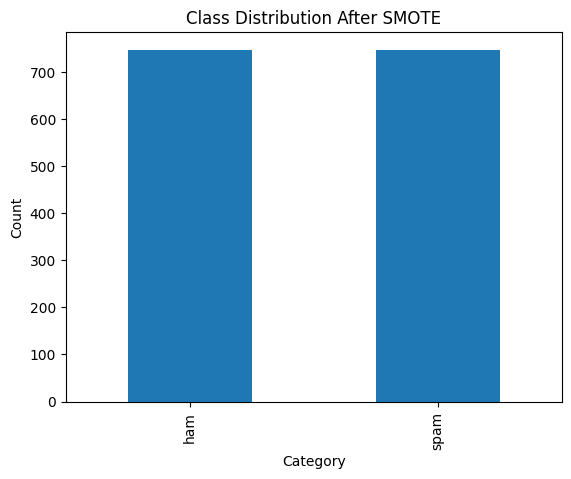

In [91]:
import matplotlib.pyplot as plt

# Plot the class distribution
df_resampled['Category'].value_counts().plot(kind='bar')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


Training set: 64% of the original data
Validation set: 16% of the original data
Test set: 20% of the original data

In [92]:
# Check for missing values in the DataFrame
print("\nMissing values in the DataFrame:")
print(df_resampled.isnull().sum())


Missing values in the DataFrame:
Category    0
Message     0
dtype: int64


In [60]:
df_resmapled = df_resampled.dropna()


In [93]:
# Assuming 'df' is your DataFrame
# Drop rows with missing values
df_resampled.dropna(subset=['Message'], inplace=True)

# Check for missing values in the modified DataFrame
print("\nMissing values in the DataFrame after dropping:")
print(df_resampled.isnull().sum())



Missing values in the DataFrame after dropping:
Category    0
Message     0
dtype: int64


In [95]:
df_resampled.reset_index(drop=True, inplace=True)  # Reset the index of the DataFrame



In [96]:
df_resampled

,Category,Message
0,ham,7 wonders in My WORLD 7th You 6th Ur style 5th...
1,ham,Ok lor... But buy wat?
2,ham,I hate when she does this. She turns what shou...
3,ham,"Sounds gd... Haha... Can... Wah, u yan jiu so ..."
4,ham,Wat happened to the cruise thing
...,...,...
1489,spam,SMS AUCTION You have won a Nokia 7250i. This i...
1490,spam,Our brand new mobile music service is now live...
1491,spam,URGENT This is our 2nd attempt to contact U. Y...
1492,spam,Win the newest åÒHarry Potter and the Order of...


In [97]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(df_resampled['Message'], df_resampled['Category'], test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

In [98]:
def get_sentence_embedding(sentences):
    preprocessed_text = preprocess_module(sentences)
    return encoder_module(preprocessed_text)['default']

# Example usage
embeddings = get_sentence_embedding([
    "500$ discount. hurry up",
    "Hello Jack, can we schedule a meeting for tomorrow?"
])

print(embeddings)

Tensor("StatefulPartitionedCall_13:0", shape=(2, 768), dtype=float32)


In [42]:
import tensorflow as tf
import tensorflow_hub as hub

# URLs for the preprocess and encoder modules
preprocess_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
encoder_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'

# Load the preprocess and encoder modules
preprocess_module = hub.load(preprocess_url)
encoder_module = hub.load(encoder_url)

#

{'sequence_output': <tf.Tensor 'StatefulPartitionedCall_3:14' shape=(None, 128, 768) dtype=float32>, 'encoder_outputs': [<tf.Tensor 'StatefulPartitionedCall_3:1' shape=(None, 128, 768) dtype=float32>, <tf.Tensor 'StatefulPartitionedCall_3:2' shape=(None, 128, 768) dtype=float32>, <tf.Tensor 'StatefulPartitionedCall_3:3' shape=(None, 128, 768) dtype=float32>, <tf.Tensor 'StatefulPartitionedCall_3:4' shape=(None, 128, 768) dtype=float32>, <tf.Tensor 'StatefulPartitionedCall_3:5' shape=(None, 128, 768) dtype=float32>, <tf.Tensor 'StatefulPartitionedCall_3:6' shape=(None, 128, 768) dtype=float32>, <tf.Tensor 'StatefulPartitionedCall_3:7' shape=(None, 128, 768) dtype=float32>, <tf.Tensor 'StatefulPartitionedCall_3:8' shape=(None, 128, 768) dtype=float32>, <tf.Tensor 'StatefulPartitionedCall_3:9' shape=(None, 128, 768) dtype=float32>, <tf.Tensor 'StatefulPartitionedCall_3:10' shape=(None, 128, 768) dtype=float32>, <tf.Tensor 'StatefulPartitionedCall_3:11' shape=(None, 128, 768) dtype=float32

In [99]:
 #Define the input layer
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name="text")

# Preprocess the input text using the preprocess module
preprocessed_text = preprocess_module(text_input)

# Pass the preprocessed text to the BERT encoder
outputs = encoder_module(preprocessed_text)

# Print the shape of the outputs
print(outputs)


{'sequence_output': <tf.Tensor 'StatefulPartitionedCall_15:14' shape=(None, 128, 768) dtype=float32>, 'encoder_outputs': [<tf.Tensor 'StatefulPartitionedCall_15:1' shape=(None, 128, 768) dtype=float32>, <tf.Tensor 'StatefulPartitionedCall_15:2' shape=(None, 128, 768) dtype=float32>, <tf.Tensor 'StatefulPartitionedCall_15:3' shape=(None, 128, 768) dtype=float32>, <tf.Tensor 'StatefulPartitionedCall_15:4' shape=(None, 128, 768) dtype=float32>, <tf.Tensor 'StatefulPartitionedCall_15:5' shape=(None, 128, 768) dtype=float32>, <tf.Tensor 'StatefulPartitionedCall_15:6' shape=(None, 128, 768) dtype=float32>, <tf.Tensor 'StatefulPartitionedCall_15:7' shape=(None, 128, 768) dtype=float32>, <tf.Tensor 'StatefulPartitionedCall_15:8' shape=(None, 128, 768) dtype=float32>, <tf.Tensor 'StatefulPartitionedCall_15:9' shape=(None, 128, 768) dtype=float32>, <tf.Tensor 'StatefulPartitionedCall_15:10' shape=(None, 128, 768) dtype=float32>, <tf.Tensor 'StatefulPartitionedCall_15:11' shape=(None, 128, 768) d

In [40]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [35]:
print(tf.__version__)

2.14.0


In [38]:
!pip install q keras==2.0.8



In [36]:
!pip install tensorflow==2.8.0


creating neural network layers

In [100]:
l = tf.keras.layers.Dropout(0.1, name='dropout')(outputs['pooled_output'])  ## dropout layer
l = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(l) ## dense layer with one neeuron with sigmoid activation


/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py:1505: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  Args:


In [101]:
model= tf.keras.Model(inputs=[text_input], outputs=[l])


In [102]:
METRICS=[
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.SensitivityAtSpecificity(0.5, name='sensitivity'),  # Set the desired specificity value
    tf.keras.metrics.SpecificityAtSensitivity(0.5, name='specificity')  # Set the desired sensitivity value
]


In [103]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

In [104]:
model.summary()  ## 768 length

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 tf_op_layer_StatefulPartit  [(None, 128),                0         ['text[0][0]']                
 ionedCall_14 (TensorFlowOp   (None, 128),                                                        
 Layer)                       (None, 128)]                                                        
                                                                                                  
 tf_op_layer_StatefulPartit  [(None, 768),                0         ['tf_op_layer_StatefulPartitio
 ionedCall_15 (TensorFlowOp   (None, 128, 768),                     nedCall_14[0][0]',      

In [105]:
model.fit(train_data, train_labels, epochs=10)

Train on 956 samples
Epoch 1/10


KeyError: ignored

In [87]:
# Check the alignment of train_data and train_labels with DataFrame indices
print("Train Data Indices:")
print(train_data.index)

print("\nTrain Labels Indices:")
print(train_labels.index)


Train Data Indices:
Int64Index([1270, 3019, 4224, 4416,  564,  781, 5539, 2459, 1670, 5199,
            ...
            5440, 4857, 2272,  963, 4212,  975, 1135, 1704, 1574, 2917],
           dtype='int64', length=3565)

Train Labels Indices:
Int64Index([1270, 3019, 4224, 4416,  564,  781, 5539, 2459, 1670, 5199,
            ...
            5440, 4857, 2272,  963, 4212,  975, 1135, 1704, 1574, 2917],
           dtype='int64', length=3565)


In [52]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Checking the indices of the DataFrame
print("Indices of the DataFrame:")
print(df_resampled.index)

# Checking the contents of the DataFrame
print("\nContents of the DataFrame:")
print(df_resampled.head())  # Display the first few rows of the DataFrame


Indices of the DataFrame:
RangeIndex(start=0, stop=9650, step=1)

Contents of the DataFrame:
  Category                                            Message
0      ham                                                NaN
1      ham  Go until jurong point, crazy.. Available only ...
2     spam                      Ok lar... Joking wif u oni...
3      ham  Free entry in 2 a wkly comp to win FA Cup fina...
4      ham  U dun say so early hor... U c already then say...


In [88]:

# Print the structure and contents of train_data
print("Train Data:")
print(train_data.head())  # Display the first few rows of train_data
print(train_data.info())  # Display the information about train_data

# Print the structure and contents of train_labels
print("\nTrain Labels:")
print(train_labels.head())  # Display the first few rows of train_labels
print(train_labels.info())  # Display the information about train_labels


Train Data:
1270    Sorry chikku, my cell got some problem thts y ...
3019    I thank you so much for all you do with selfle...
4224    \The world suffers a lot... Not because of the...
4416     says that he's quitting at least5times a day ...
564     Fuck babe ... I miss you already, you know ? C...
Name: Message, dtype: object
<class 'pandas.core.series.Series'>
Int64Index: 3565 entries, 1270 to 2917
Series name: Message
Non-Null Count  Dtype 
--------------  ----- 
3565 non-null   object
dtypes: object(1)
memory usage: 184.7+ KB
None

Train Labels:
1270    ham
3019    ham
4224    ham
4416    ham
564     ham
Name: Category, dtype: object
<class 'pandas.core.series.Series'>
Int64Index: 3565 entries, 1270 to 2917
Series name: Category
Non-Null Count  Dtype 
--------------  ----- 
3565 non-null   object
dtypes: object(1)
memory usage: 55.7+ KB
None
